In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank=pd.read_csv("bank_format.csv")




In [3]:

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# checking for duplicate entry.
y=bank.duplicated()
y.unique()

array([False])

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank.y.unique()

array(['no', 'yes'], dtype=object)

In [7]:
# visualising missing values if any.
!pip install missingno



<AxesSubplot:>

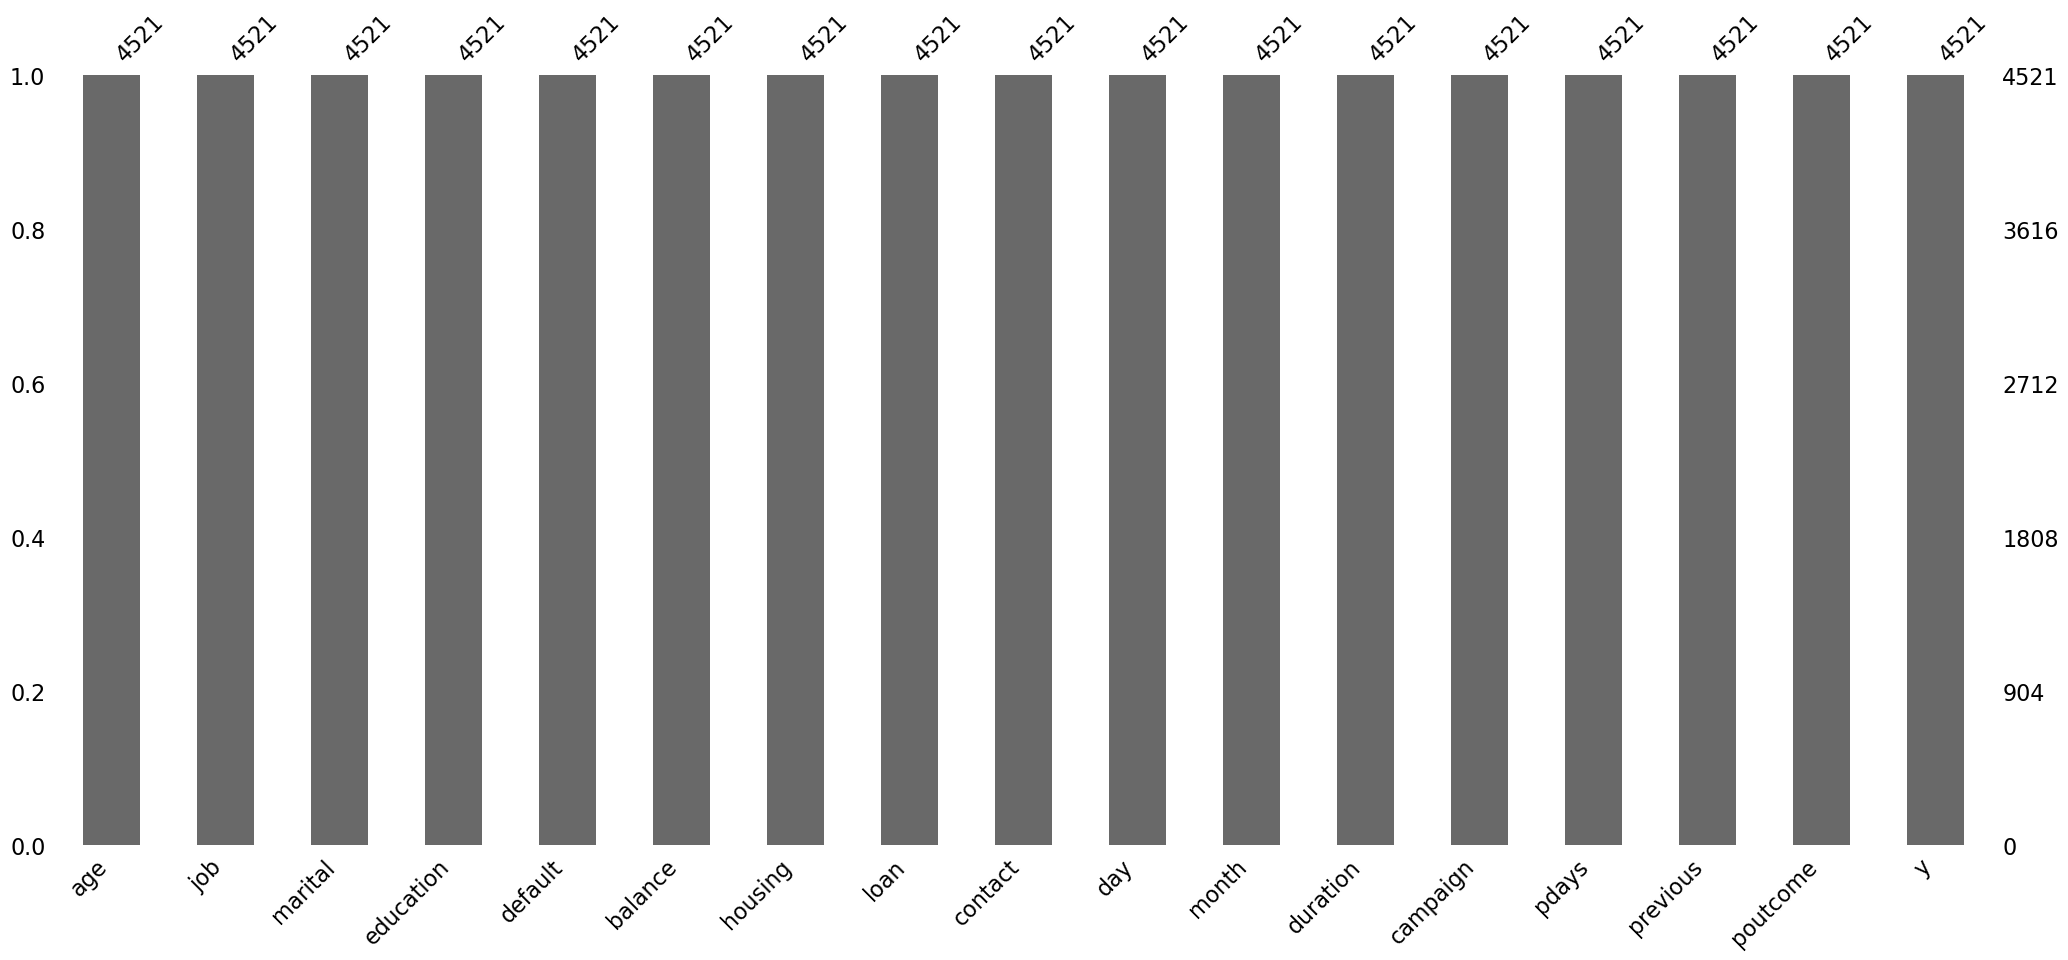

In [8]:
#no missisng datas
import missingno as msno
msno.bar(bank)

# 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

y
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64


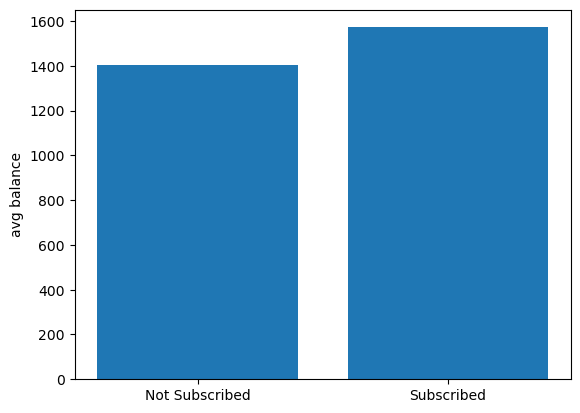

In [9]:
avba=bank.groupby(by='y').balance.mean()
print(avba)
x=['Not Subscribed','Subscribed']
plt.bar(x,height=avba)
plt.ylabel("avg balance")
plt.xticks(x)
plt.show()


# 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.


primary       678
secondary    2306
tertiary     1350
unknown       187
Name: education, dtype: int64
['primary', 'secondary', 'tertiary', 'unknown']


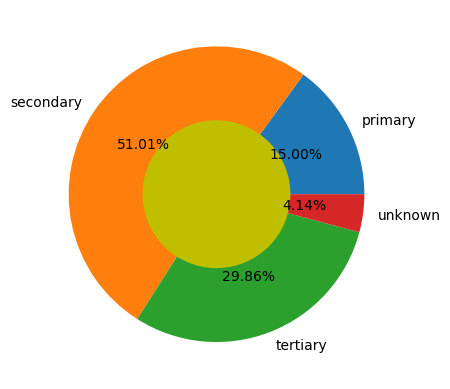

<Figure size 500x800 with 0 Axes>

In [10]:
edu=bank['education'].value_counts().sort_index()  

print(edu)
xli=[edu for edu,df in bank.groupby("education")]
print(xli)
plt.pie(x=edu,labels=xli,autopct='%.2f%%')
plt.pie(x=[1],colors='yellow',radius=0.5)
plt.figure(figsize=(5,8))
plt.show()

# 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [11]:
bank['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [12]:
# Define a dictionary that maps months to seasons
seasons_dict = {'jan': 'winter',
                'feb': 'winter',
                'mar': 'spring',
                'apr': 'spring',
                'may': 'spring',
                'jun': 'summer',
                'jul': 'summer',
                'aug': 'summer',
                'sep': 'fall',
                'oct': 'fall',
                'nov': 'fall',
                'dec': 'winter'}

bank['seasons'] = bank['month'].map(seasons_dict)



# 6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

<AxesSubplot:xlabel='seasons,y'>

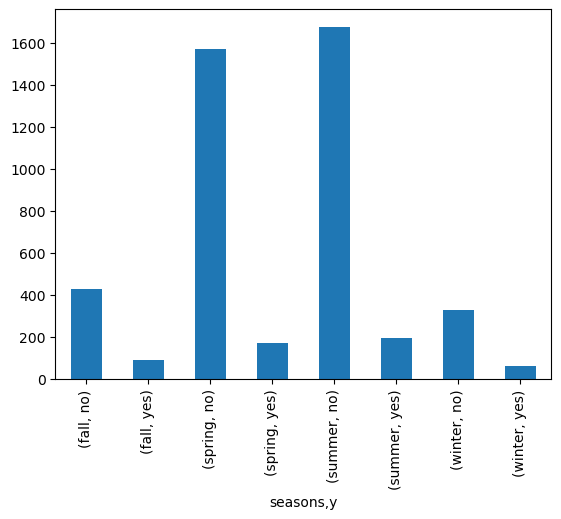

In [13]:
bank.groupby(by='seasons')['y'].value_counts().plot(kind='bar')


<AxesSubplot:xlabel='seasons', ylabel='count'>

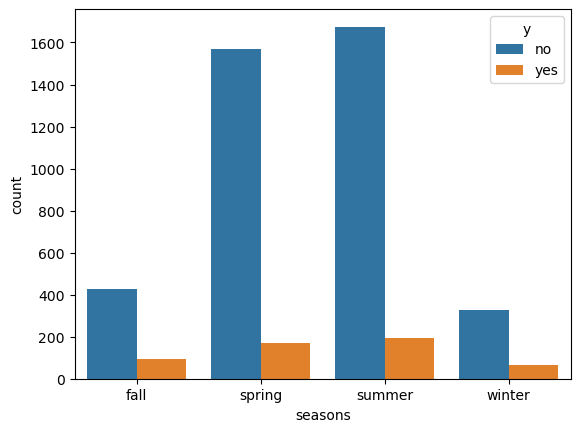

In [14]:
#cp=bank.pivot_table(index='seasons',values='y',aggfunc='count')
#print(cp)
sns.countplot(data=bank,x='seasons',hue='y',)

# 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the barb plot.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

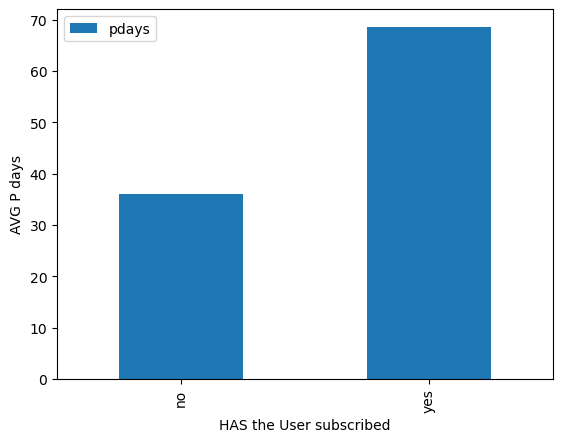

In [15]:
pd.pivot_table(data=bank, index='y', values='pdays').plot(kind='bar')
plt.xlabel("HAS the User subscribed")
plt.ylabel("AVG P days")
plt.xticks(rotation=90)

# 8. Replace the -1 as nan values for the P-days store.

In [16]:
b=pd.read_csv('bank_format.csv',sep=';\s*',engine='python')
bank['pdays']=b['pdays']
bank.head()
bank['pdays']=bank['pdays'].replace({-1:np.nan})
bank.head()
bank.pdays.unique()

KeyError: 'pdays'

# 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

In [ ]:
pd.pivot_table(data=bank, index='y', values='pdays').plot(kind='bar')
plt.xlabel("HAS the User subscribed")
plt.ylabel("AVG P days")
plt.xticks(rotation=360)
plt.show()

# 10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.


In [ ]:
bank.y.unique()


In [ ]:
bnew=bank[(bank['balance']<0) &  (bank['y']=='yes')]['balance'].count()
bnew


# YES 31 custormers whose balnce is less that 0 subscribed to the term deposit.

In [ ]:
filtered_data = bank[bank['balance'] < 0]
fig, ax = plt.subplots()

# Plot a histogram of the balance for customers who took and did not take the term subscription
ax.hist(filtered_data[filtered_data['y'] == 'yes']['balance'], bins=50, alpha=0.5, label='Term Subscription Taken')
#ax.hist(filtered_data[filtered_data['y'] == 'no']['balance'], bins=50, alpha=0.5, label='Term Subscription Not Taken')

# Add labels and legend to the plot
ax.set_xlabel('Balance')
ax.set_ylabel('Count')
ax.set_title('Balance vs. Term Subscription')
ax.legend()

# Show the plot
plt.show()


# 11. Use Pivot table to find the maximum balance for each type of job. 

In [ ]:
maxp=bank.pivot_table(index='job',values='balance',aggfunc='max')
x=maxp.reset_index().rename(columns=({'balance':'maximum balance'}))
print(x)
sns.barplot(x=x['maximum balance'], y=x.job, orient='h')
plt.show()


12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

In [ ]:
sns.scatterplot(x=bank.age,y=bank.balance,hue=bank.y)

13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

In [ ]:
sns.violinplot(x=bank.y,y=bank.balance,hue=bank.y)

In [ ]:
sns.boxplot(x=bank.y,y=bank.balance,hue=bank.y)

14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method


In [ ]:
plt.pie(x=bank.default.value_counts(),autopct='%.2f%%',labels=bank.default.unique())

# 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

In [ ]:
sns.boxplot(data=bank, x='y', y='pdays')

In [ ]:
sns.stripplot(data=bank, x='y', y='pdays')